## 머신러닝 모델의 평가

#### 학습 과정
1. 훈련세트, 검증세트, 테스트세트 데이터 준비
2. 훈련세트를 통해 모델 학습
3. 검증 세트를 통해 하이퍼 파라미터 조정
4. 테스트 세트로 최종 모델 성능 평가

#### 데이터 구조
샘플(데이터)와 특성

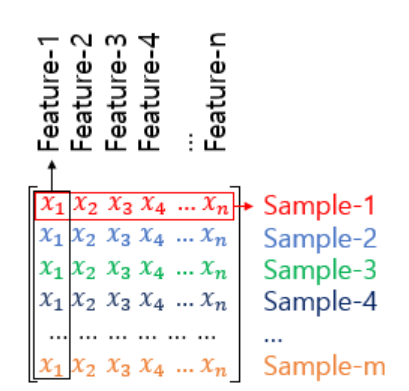

#### 혼동 행렬(Confusion Matrix)
- 정확도(Accuracy): 맞춘 문제/전체 문제
- 혼동 행렬: True/False는 실제 정답, Positive/Negative는 모델 예측
    - TP(True Positive)
    - TN(True Negative)
    - FP(False Positive)
    - FN(False Negative)
- 정밀도(Precision): 양성이라고 대답한 전체 케이세애 대한 TP비율
$Precision = \frac{TP}{TP+FP}$

- 재현율(Recall): 실제값이 양성인 데이터의 전체 개수에 대한 TP비율
$Recall =  \frac{TP}{TP+FP}$

#### 과적합/과소적합
- 과적합: 훈련데이터에 과하게 학습된 경우
    - 훈련 데이터 오차는 낮지만 테스트 데이터 오차는 높음
    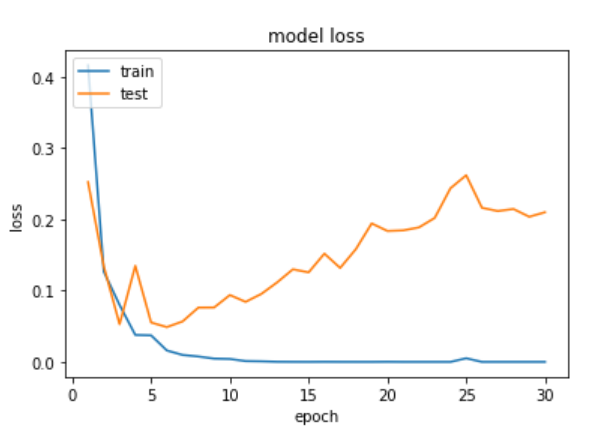
- 과소적합: 훈련이 덜 된 상태
    - 훈련 데이터에 대한 오차가 높음


## 활성화 함수

#### 비선형성
- 모델의 성능을 높이기 위해선 은닉층을 추가해야 하는데 활성화 함수로 선형 함수를 사용할 경우 은닉층이 하나인 것과 동일
- 활성화 함수를 비선형 함수로 사용하여 모델의 선형성을 없앰.

#### 시그모이드의 기울기 소실
- 시그모이드함수는 0~1사이의 값
- 하지만 0과1에 가까워질수록 기울기가 0에 수렴하게 됨
- 역전파를 통해 이를 미분한 값을 곱하게 되면 0에 가까운 값이 곱해짐
- 이전의 기울기가 미비하게 또는 거의 전달되지 않음
- 하이퍼볼릭 탄젠트도 시그모이드와 비슷한 문제가 발생하지만 변화폭이 시그모이드의 두배(-1~1)이므로 시그모이드보다 기울기 소실이 적음

#### ReLU함수
- $ReLU(x) = max(0,x)$

- ReLU함수는 음수값은 0으로 양수값은 x값 그대로 반환
- 특정 값에 수렴하지 않기때문에 기울기 소실 문제 없음
- 단순 연산으로 계산 속도 빠름
- 하지만 음수값은 0이 되므로 기울기도0(dying ReLU)

#### Leaky ReLU
- Leaky ReLU는 기존 ReLU함수에서 음수값을 0으로 바꾸는 문제를 해결하기 위해 입력값이 음수일 경우 0.01과 같은 0이 아닌 수를 반환하도록 함
- $Leaky_ReLU(x) = max(ax, x)$
- a는 하이퍼 파라미터로 조절 가능
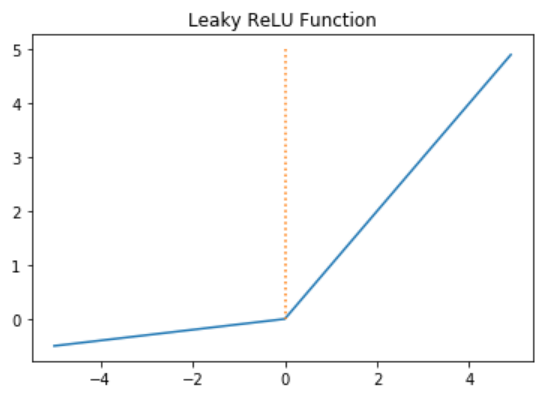

#### Softmax함수
- 다중 분류 문제에 사용
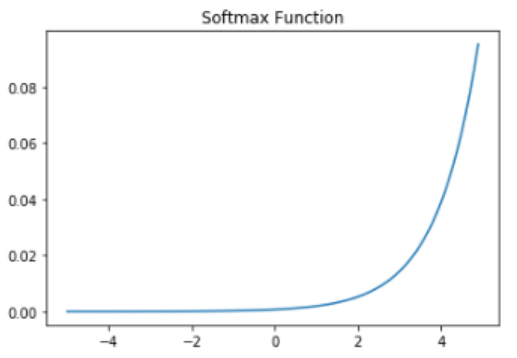


#### 정리

문제|활성화 함수|손실 함수
-|-|-
이진 분류|시그모이드|nn.BCELoss()
다중 클래스 분류|소프트맥스|nn.CrossEntropyLoss()
회귀|없음|MSE

### 단층 신경망으로 AND,NAND,OR 게이트 구현
- AND게이트: 두개의 값이 모두 1인 경우에만 1 출력
- NAND게이트: 두개의 값이 모두 1인 경우에만 0 출력
- OR게이트: 두개의 값중 하나만 1이어도 1출력

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def AND_gate(x1, x2):
    w1 = 0.5
    w2 = 0.5
    b = -0.7
    result = x1*w1 + x2*w2 + b
    
    if result>=0:
        return 1
    else:
        return 0

In [3]:
AND_gate(0,0), AND_gate(1,0), AND_gate(0,1), AND_gate(1,1)

(0, 0, 0, 1)

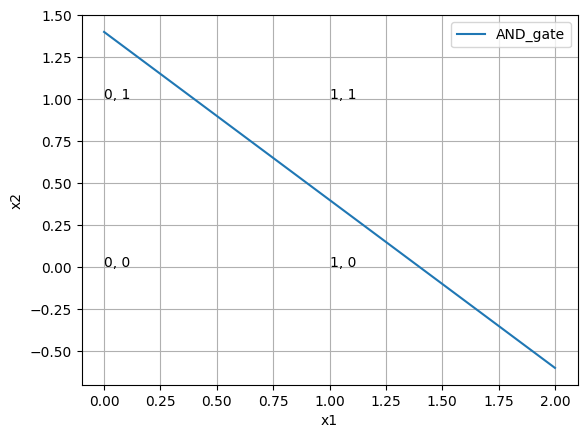

In [25]:
w1 = 0.5
w2 = 0.5
b = -0.7

x = np.linspace(0, 2, 5)
y = (w1*x + b)/-w2

x_point = [0, 0, 1, 1]
y_point = [0, 1, 0, 1]

plt.plot(x,y, label="AND_gate")
for px, py in zip(x_point, y_point):
    plt.text(px, py, f"{px}, {py}")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
def NAND_gate(x1, x2):
    w1 = 0.5
    w2 = 0.5
    b = -0.7
    result = x1*w1 + x2*w2 + b

    if result>=0:
        return 0
    else:
        return 1

In [5]:
NAND_gate(0,0),NAND_gate(1,0),NAND_gate(0,1),NAND_gate(1,1)

(1, 1, 1, 0)

In [6]:
def OR_gate(x1, x2):
    w1 = 0.5
    w2 = 0.5
    b = -0.4
    result = x1*w1 + x2*w2 + b

    if result>=0:
        return 1
    else:
        return 0

In [7]:
OR_gate(0,0),OR_gate(1,0),OR_gate(0,1),OR_gate(1,1)

(0, 1, 1, 1)